In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train , (X_train.shape[0],X_train.shape[1],1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/home/shubham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shubham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shubham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shubham/anaconda3/lib/python3.7/site-packages/t

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units =1))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train,y_train,epochs = 100,batch_size = 24)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0324
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0056
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test["Open"]),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

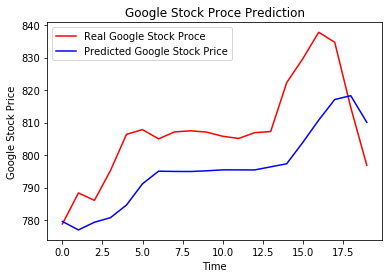

In [17]:
plt.plot(real_stock_price , color = 'red' ,label = 'Real Google Stock Proce')
plt.plot(predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Proce Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()